In [2]:
#from __future__ import print_function

import numpy as np
import pandas as pd
import random
import datetime
import re
random.seed(2010)

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras_tqdm import TQDMCallback, TQDMNotebookCallback


Using TensorFlow backend.


In [3]:
Data = pd.read_csv('data/marathon_results_2015.csv')[['M/F','Age','Official Time']]
def convertToSeconds(t):
    h,m,s = re.split(':',t)
    return int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())

Data['Official Time'] = Data['Official Time'].apply(convertToSeconds)
Data

,M/F,Age,Official Time
0,M,25,7757
1,M,30,7788
2,M,29,7822
3,M,28,7847
4,M,32,7849
5,M,30,7852
6,M,32,7880
7,M,39,7962
8,M,27,8015
9,M,33,8032


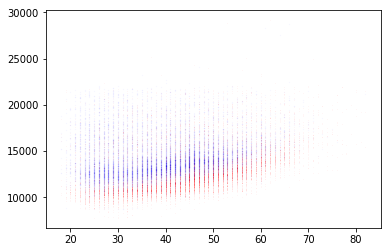

In [4]:
Males = Data[Data['M/F']=='M']
Females = Data[Data['M/F']=='F']

plt.plot(Males['Age'],Males['Official Time'],'xr',ms= .01)
plt.plot(Females['Age'],Females['Official Time'],'sb',ms= .01)


In [29]:
#################################
#######Construct Network#########
#################################

# Define sudoMin loss function


# Convolutional layers

# Example from Keras github


batch_size = 128
no_predictions = 3
epochs = 10000


def customLoss(yTrue,yPred):
    ratio = .0001
    return K.sum(K.min(K.abs(yTrue-yPred),axis = 1))+ ratio*K.sum(K.sum(K.square(yTrue-yPred),axis = 1),axis = 0)


train_percent= .99
test_percent = .01

Train, Test  = train_test_split(Data[['Age','Official Time']], train_size = train_percent,test_size = test_percent)
x_train,y_train = Train['Age'],Train['Official Time'] 
x_test,y_test = Test['Age'],Test['Official Time'] 
# the data, split between train and test sets

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices


model = Sequential()
model.add(Dense(64, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros',
                input_shape=[1]))
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(no_predictions, activation='linear'))

model.compile(loss=customLoss,
              optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

x_train shape: (26332,)
26332 train samples
266 test samples
Test loss: 100045.33825775376


Text(0.5,1,'Marathon Test')

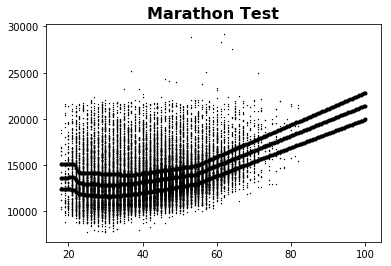

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()
X = np.linspace(18, 100, 200)
#Y1,Y2 = zip(*model.predict(X))
model_output_linspace = zip(*model.predict(X))

plt.scatter(x_train, y_train,s = .2, c='black',marker= '^',zorder=2)
#plt.scatter(x_test, y_test, s = .2 ,c='black',zorder=2)

for Y in model_output_linspace:
    line, =plt.plot(X,Y, '.b',linewidth = 3,zorder=1)
    line.set_color("black")
#plt.plot(X,Y3, 'b-',linewidth = 3)
#plt.plot(X,Y4, 'y-',linewidth = 3)

#plt.ylim(0,300)
# Add title and x, y labels
plt.title("Marathon Test", fontsize=16, fontweight='bold')


In [32]:
model_output_individual = zip(*model.predict(Data['Age']))
i=0
for Y in model_output_individual:
    i+=1
    Data['abs_residual_{}'.format(i)] = np.abs(Data['Official Time'] - Y)

Data['Cluster'] = Data['Res1']<Data['Res2']

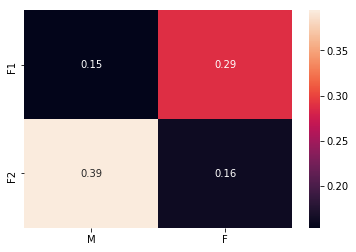

In [15]:
Total = Data.shape[0]
C[i]=

C1 = ((Data['Res1'] < Data['Res2']) & (Data['M/F'] == 'M')).sum()/Total
C2 = ((Data['Res1'] < Data['Res2']) & (Data['M/F'] == 'F')).sum()/Total
C3 = ((Data['Res1'] >= Data['Res2']) & (Data['M/F'] == 'M')).sum()/Total
C4 = ((Data['Res1'] >= Data['Res2']) & (Data['M/F'] == 'F')).sum()/Total
DF = pd.DataFrame([[C1,C2],[C3,C4]],columns = ['M','F'],index  = ['F1','F2'])
sn.heatmap(DF, annot=True)

In [27]:
if (C1> C2):
    print("Accuracy : {}".format((C1+C4)/(C1+C2+C3+C4)))
    Males_TP = Data[(Data['M/F']=='M') & Data['Cluster'] == 1]
    Females_TN = Data[(Data['M/F']=='F') & Data['Cluster'] == 0]
    Males_FP = Data[(Data['M/F']=='M') & Data['Cluster'] == 0]
    Females_FN = Data[(Data['M/F']=='F') & Data['Cluster'] == 1]   
else:
    print("Accuracy : {}".format((C2+C3)/(C1+C2+C3+C4)))
    Males_TP = Data[(Data['M/F']=='M') & Data['Cluster'] == 0]
    Females_TN = Data[(Data['M/F']=='F') & Data['Cluster'] == 1]
    Males_FP = Data[(Data['M/F']=='M') & Data['Cluster'] == 1]
    Females_FN = Data[(Data['M/F']=='F') & Data['Cluster'] == 0]   


Accuracy : 0.6829836829836831


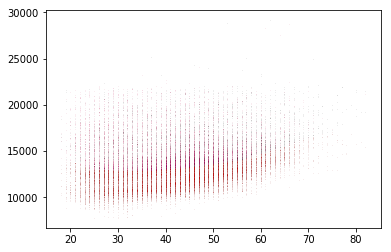

In [28]:

plt.plot(Males_FP['Age'],Males_FP['Official Time'],'x',color = 'black',ms= .01)
plt.plot(Females_FN['Age'],Females_FN['Official Time'],'x',color='black',ms= .01)
plt.plot(Males_TP['Age'],Males_TP['Official Time'],'x',color='red',ms= .01)
plt.plot(Females_TN['Age'],Females_TN['Official Time'],'x',color='purple',ms= .01)


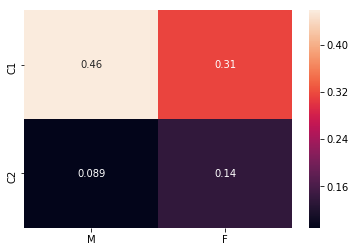

In [18]:
GM = GaussianMixture(n_components = 2, n_init = 3, init_params = 'random')

Data['GM Label'] = GM.fit_predict(Data[['Age','Official Time']])
GM_C1 = (Data['GM Label'] & (Data['M/F'] == 'M')).sum()/Total
GM_C2 = (Data['GM Label'] & (Data['M/F'] == 'F')).sum()/Total
GM_C3 = ((Data['GM Label'] == 0) & (Data['M/F'] == 'M')).sum()/Total
GM_C4 = ((Data['GM Label'] == 0) & (Data['M/F'] == 'F')).sum()/Total

DF = pd.DataFrame([[GM_C1,GM_C2],[GM_C3,GM_C4]],columns = ['M','F'],index  = ['C1','C2'])
sn.heatmap(DF, annot=True)
#print("Accuracy : {}".format((GM_C1+GM_C4)/(GM_C1+GM_C2+GM_C3+GM_C4)))

In [22]:
if (GM_C1> GM_C2):
    print("Accuracy : {}".format((GM_C1+GM_C4)/(GM_C1+GM_C2+GM_C3+GM_C4)))
    Males_TP_GM = Data[(Data['M/F']=='M') & (Data['GM Label'] == 1)]
    Females_TN_GM = Data[(Data['M/F']=='F') & Data['GM Label'] == 0]
    Males_FP_GM = Data[(Data['M/F']=='M')& Data['GM Label'] == 0]
    Females_FN_GM = Data[(Data['M/F']=='F') & Data['GM Label'] == 1]    
else:
    print("Accuracy : {}".format((GM_C3+GM_C2)/(GM_C1+GM_C2+GM_C3+GM_C4)))
    Males_TP_GM = Data[(Data['M/F']=='M') & Data['GM Label'] == 0]
    Females_TN_GM = Data[(Data['M/F']=='F') & Data['GM Label'] == 1]
    Males_FP_GM = Data[(Data['M/F']=='M') & Data['GM Label'] == 1]
    Females_FN_GM = Data[(Data['M/F']=='F') & Data['GM Label'] == 0]   


Accuracy : 0.5960598541243702


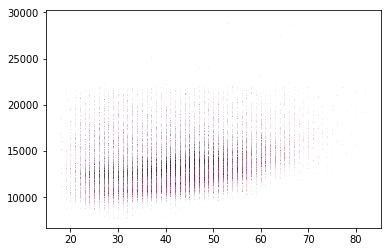

In [26]:

plt.plot(Males_FP_GM['Age'],Males_FP_GM['Official Time'],'x',color = 'black',ms= .01)
plt.plot(Females_FN_GM['Age'],Females_FN_GM['Official Time'],'x',color='black',ms= .01)
plt.plot(Males_TP_GM['Age'],Males_TP_GM['Official Time'],'x',color='red',ms= .01)
plt.plot(Females_TN_GM['Age'],Females_TN_GM['Official Time'],'x',color='purple',ms= .01)
